# SpaceX Falcon 9 First Stage Landing Prediction: A Data Science Capstone Project

## Exploratory Data Analysis and Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://github.com/JayshreeMishra/Dataset_Data_Science_Project/raw/main/dataset_part_2.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,landing_class,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,0


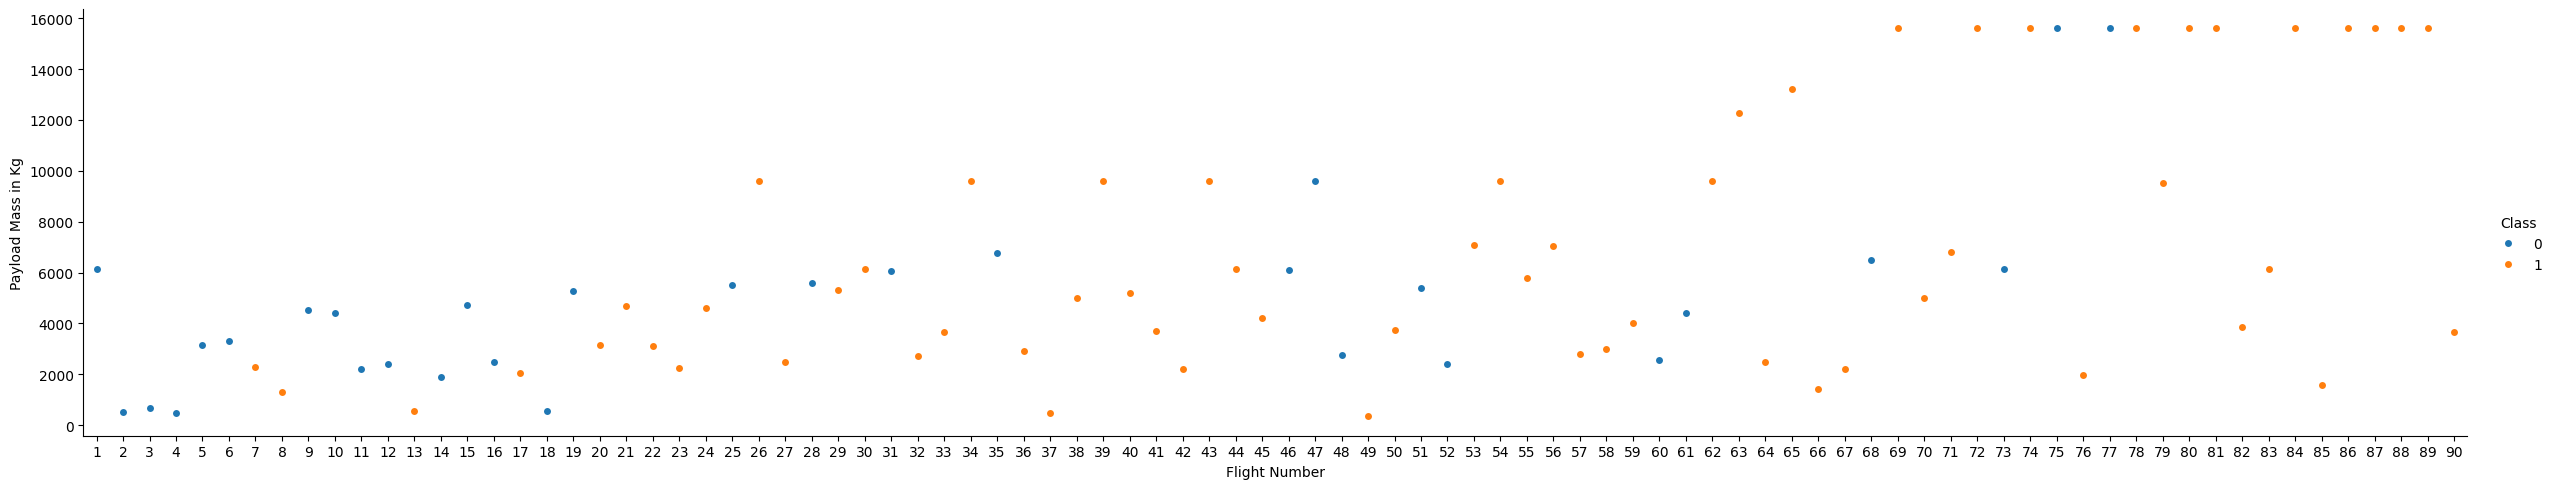

In [3]:
# relationship between Flight Number and Payload
sns.catplot(x="FlightNumber", y="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number")
plt.ylabel("Payload Mass in Kg")
plt.show()

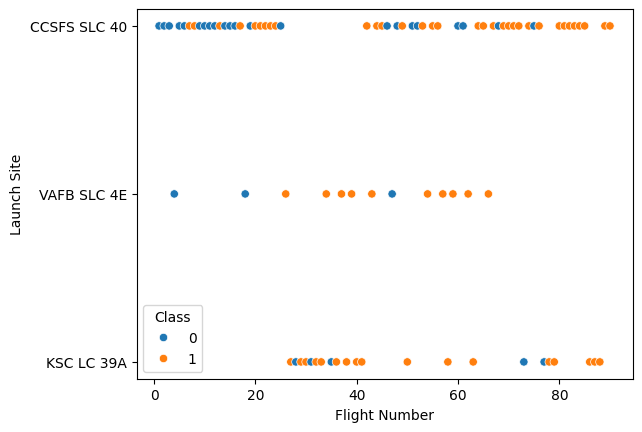

In [4]:
# relationship between Flight Number and Launch Site
sns.scatterplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df)
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.show()

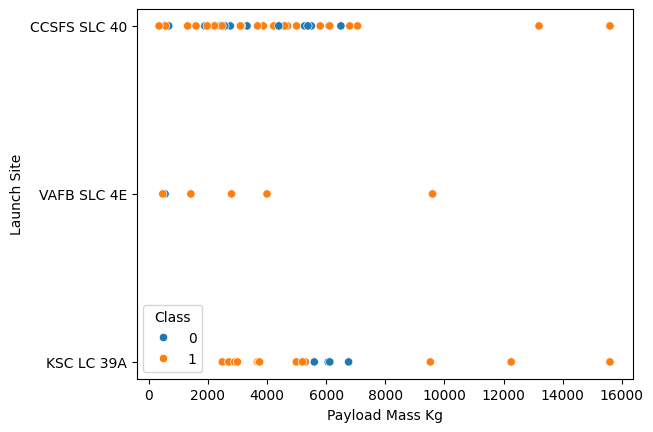

In [5]:
# relationship between Payload and Launch Site
sns.scatterplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df)
plt.xlabel("Payload Mass Kg")
plt.ylabel("Launch Site")
plt.show()

In [6]:
#relationship between success rate of each orbit type

# Grouping the DataFrame by the 'Orbit' column, calculating the mean of the 'Class' column for each group, 
# and resetting the index to turn the result into a new DataFrame.
# Sorting the DataFrame based on the 'Class' column in descending order.
sr_df=df.groupby("Orbit")["Class"].mean().reset_index().sort_values(by="Class", ascending=False)

# Multiplying the 'Class' column by 100 to convert the mean values to percentages
sr_df["Class"]= sr_df["Class"]*100

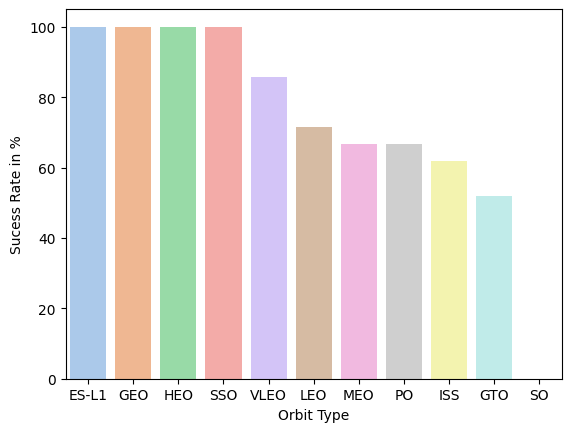

In [7]:
sns.barplot(x="Orbit", y="Class", hue="Orbit", data=sr_df, palette="pastel")
plt.xlabel("Orbit Type")
plt.ylabel("Sucess Rate in %")
plt.show()

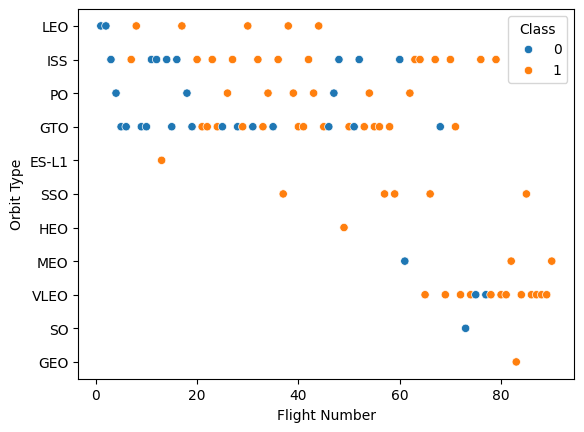

In [8]:
# relationship between FlightNumber and Orbit type
sns.scatterplot(x="FlightNumber", y="Orbit", hue="Class", data=df)
plt.xlabel("Flight Number")
plt.ylabel("Orbit Type")
plt.show()

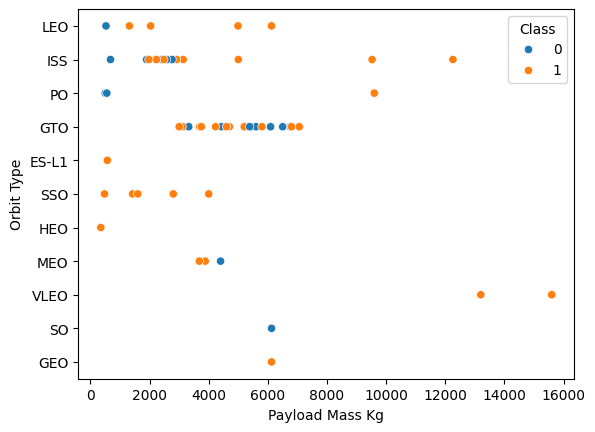

In [9]:
# relationship between Payload and Orbit type
sns.scatterplot(x="PayloadMass", y="Orbit", hue="Class", data=df)
plt.xlabel("Payload Mass Kg")
plt.ylabel("Orbit Type")
plt.show()

In [10]:
# Visualize the launch success yearly trend

# A function to extract year from date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

# Extracting the year from the 'Date' column
df["Year"]=pd.to_datetime(df["Date"]).dt.year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,landing_class,Class,Year
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,0,2013


In [11]:
# average success rate for each year
avg_sr= df.groupby("Year")["Class"].mean().reset_index()
avg_sr["Class"]=avg_sr["Class"]*100

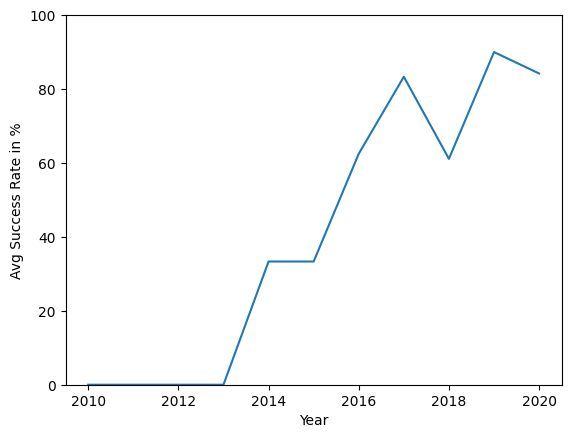

In [12]:
sns.lineplot(x="Year", y="Class", data=avg_sr)
plt.xlabel("Year")
plt.ylabel("Avg Success Rate in %")
plt.ylim(0, 100)
plt.show()

### Feature Engineering

In [13]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [14]:
# Create dummy variables to categorical columns
feature_one_hot=pd.get_dummies(features, columns=["Orbit", "LaunchSite", "LandingPad", "Serial"])
feature_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
feature_one_hot.dtypes

FlightNumber      int64
PayloadMass     float64
Flights           int64
GridFins           bool
Reused             bool
                 ...   
Serial_B1056       bool
Serial_B1058       bool
Serial_B1059       bool
Serial_B1060       bool
Serial_B1062       bool
Length: 80, dtype: object

In [16]:
# Casting all numeric columns to float64
feature_one_hot.astype("float64")

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15600.000000,2.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15600.000000,3.0,1.0,1.0,1.0,5.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15600.000000,6.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15600.000000,3.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
feature_one_hot.to_csv("dataset_part_3.csv", index=False)